# NVAE Experiment on CIFAR-10

This notebook implements the training and evaluation pipeline for the Nouveau VAE (NVAE) model on CIFAR-10.

## 1. Google Colab Setup
Mount Drive and clone the repository (Fresh Copy).

In [1]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

import os
import sys
import shutil

# --- CONFIGURATION ---
REPO_PATH = '/content/drive/MyDrive/Generative-Modeling-on-CIFAR-10'
REPO_URL = "https://github.com/konstantine25b/Generative-Modeling-on-CIFAR-10.git"

# 1. Delete repo if it already exists (Ensure fresh code)
if os.path.exists(REPO_PATH):
    print(f"Deleting existing repository at {REPO_PATH}...")
    shutil.rmtree(REPO_PATH)

# 2. Clone repository
os.chdir('/content/drive/MyDrive')
print(f"Cloning repository to {REPO_PATH}...")
!git clone {REPO_URL}

# 3. Enter the repository
os.chdir(REPO_PATH)
print(f"Current working directory: {os.getcwd()}")

# 4. Add source code to Python path
sys.path.append(os.path.join(REPO_PATH, 'src'))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Deleting existing repository at /content/drive/MyDrive/Generative-Modeling-on-CIFAR-10...
Cloning repository to /content/drive/MyDrive/Generative-Modeling-on-CIFAR-10...
Cloning into 'Generative-Modeling-on-CIFAR-10'...
remote: Enumerating objects: 190, done.
remote: Counting objects: 100% (157/157), done.
remote: Compressing objects: 100% (107/107), done.
remote: Total 190 (delta 97), reused 103 (delta 48), pack-reused 33 (from 1)
Receiving objects: 100% (190/190), 215.80 MiB | 18.95 MiB/s, done.
Resolving deltas: 100% (104/104), done.
Updating files: 100% (36/36), done.
Current working directory: /content/drive/MyDrive/Generative-Modeling-on-CIFAR-10


## 2. GitHub Configuration (Optional)
Configure this if you want to push results back to the repo.

In [2]:
# GitHub Configuration & Setup
import os

try:
    # 1. Configure Git
    user_name = "konstantine25b"
    mail = "konstantine25b@gmail.com"

    # --- IMPORTANT: PASTE YOUR TOKEN BELOW ---
    my_token = "YOUR_TOKEN_HERE"

    if my_token == "YOUR_TOKEN_HERE":
        print("⚠️ PLEASE UPDATE 'my_token' in the code cell with your actual GitHub token to enable pushing.")

    repo_url = f"https://{my_token}@github.com/konstantine25b/Generative-Modeling-on-CIFAR-10.git"

    !git config --global user.name "{user_name}"
    !git config --global user.email "{mail}"

    # 2. Set Remote URL
    if os.path.isdir(".git") and my_token != "YOUR_TOKEN_HERE":
        !git remote set-url origin "{repo_url}"
        print("Git configured successfully for pushing.")
    else:
        print("Skipping remote setup (either not a git repo or token not set).")

except Exception as e:
    print(f"Error setting up GitHub: {e}")

⚠️ PLEASE UPDATE 'my_token' in the code cell with your actual GitHub token to enable pushing.
Skipping remote setup (either not a git repo or token not set).


## 3. Install Dependencies

In [3]:
!pip install -r requirements.txt
!pip install wandb -q

import wandb
wandb.login()

wandb: [wandb.login()] Loaded credentials for https://api.wandb.ai from /root/.netrc.
wandb: Currently logged in as: konstantine25b (konstantine25b-free-university-of-tbilisi-) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


True

## 4. Setup Experiment

In [4]:
import torch
from src.utils.data_loader import get_cifar10_loaders
from src.vae.train import train_vae
from src.vae.sampling import generate_samples, save_sample_grid
import matplotlib.pyplot as plt
import numpy as np
import torchvision
import wandb

# Configuration
config = {
    'epochs': 150,
    'batch_size': 64,
    'lr': 1e-3,
    'hidden_dim': 64,
    'latent_dim': 20,
    'num_scales': 2,
    'warmup_epochs': 110,
    'weight_decay': 3e-4,
    'use_wandb': True, # Set to True if using WandB
    # Save checkpoints OUTSIDE the repo folder to avoid deletion during re-runs
    'model_save_dir': '/content/drive/MyDrive/Generative-Modeling-on-CIFAR-10-Checkpoints/nvae_exp1',
    'results_dir': 'results/'
}

# Create directories
os.makedirs(config['model_save_dir'], exist_ok=True)
os.makedirs(config['results_dir'], exist_ok=True)

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"Using device: {device}")
print(f"Checkpoints will be saved to: {config['model_save_dir']}")

Using device: cuda
Checkpoints will be saved to: /content/drive/MyDrive/Generative-Modeling-on-CIFAR-10-Checkpoints/nvae_exp1


## 5. Load Data

In [5]:
train_loader, val_loader, test_loader = get_cifar10_loaders(
    data_dir='./data',
    batch_size=config['batch_size']
)

Data Loaders ready: Train=45000, Val=5000, Test=10000


## 6. Train Model

In [6]:
# Start Training
train_vae(config, train_loader, val_loader, device)

Model initialized on cuda
Resuming from checkpoint: /content/drive/MyDrive/Generative-Modeling-on-CIFAR-10-Checkpoints/nvae_exp1/nvae_epoch_110.pth
Resumed training from epoch 110


Epoch 111/150: 100%|██████████| 704/704 [01:30<00:00,  7.74it/s, loss=14219.55, bpd=6.68, beta=1.00]


=== Epoch 111 Summary ===
Train Loss: 9614.5787 | Recon: 8356.0312 | KL: 1258.5475 | BPD: 4.5153


Val Loss:   9614.2594 | Val BPD: 4.5151
💾 Saved epoch checkpoint to /content/drive/MyDrive/Generative-Modeling-on-CIFAR-10-Checkpoints/nvae_exp1/nvae_epoch_111.pth


Epoch 112/150: 100%|██████████| 704/704 [01:32<00:00,  7.64it/s, loss=15625.98, bpd=7.34, beta=1.00]


=== Epoch 112 Summary ===
Train Loss: 9619.4416 | Recon: 8360.6628 | KL: 1258.7787 | BPD: 4.5176


Val Loss:   9535.5102 | Val BPD: 4.4781
💾 Saved epoch checkpoint to /content/drive/MyDrive/Generative-Modeling-on-CIFAR-10-Checkpoints/nvae_exp1/nvae_epoch_112.pth


Epoch 113/150: 100%|██████████| 704/704 [01:31<00:00,  7.66it/s, loss=12080.68, bpd=5.67, beta=1.00]


=== Epoch 113 Summary ===
Train Loss: 9607.0236 | Recon: 8345.3501 | KL: 1261.6734 | BPD: 4.5117


Val Loss:   9559.5209 | Val BPD: 4.4894
💾 Saved epoch checkpoint to /content/drive/MyDrive/Generative-Modeling-on-CIFAR-10-Checkpoints/nvae_exp1/nvae_epoch_113.pth


Epoch 114/150: 100%|██████████| 704/704 [01:32<00:00,  7.65it/s, loss=9561.62, bpd=4.49, beta=1.00]


=== Epoch 114 Summary ===
Train Loss: 9601.0133 | Recon: 8338.5620 | KL: 1262.4513 | BPD: 4.5089


Val Loss:   9567.2804 | Val BPD: 4.4931
💾 Saved epoch checkpoint to /content/drive/MyDrive/Generative-Modeling-on-CIFAR-10-Checkpoints/nvae_exp1/nvae_epoch_114.pth


Epoch 115/150: 100%|██████████| 704/704 [01:32<00:00,  7.64it/s, loss=13860.77, bpd=6.51, beta=1.00]


=== Epoch 115 Summary ===
Train Loss: 9597.8427 | Recon: 8333.6142 | KL: 1264.2285 | BPD: 4.5074


Val Loss:   9508.1805 | Val BPD: 4.4653
💾 Saved epoch checkpoint to /content/drive/MyDrive/Generative-Modeling-on-CIFAR-10-Checkpoints/nvae_exp1/nvae_epoch_115.pth


Epoch 116/150: 100%|██████████| 704/704 [01:31<00:00,  7.66it/s, loss=10249.78, bpd=4.81, beta=1.00]


=== Epoch 116 Summary ===
Train Loss: 9600.5639 | Recon: 8337.2316 | KL: 1263.3323 | BPD: 4.5087


Val Loss:   9491.3948 | Val BPD: 4.4574
✅ Saved best model to /content/drive/MyDrive/Generative-Modeling-on-CIFAR-10-Checkpoints/nvae_exp1/nvae_best.pth (Val Loss: 9491.3948)
💾 Saved epoch checkpoint to /content/drive/MyDrive/Generative-Modeling-on-CIFAR-10-Checkpoints/nvae_exp1/nvae_epoch_116.pth


Epoch 117/150: 100%|██████████| 704/704 [01:32<00:00,  7.61it/s, loss=14477.77, bpd=6.80, beta=1.00]


=== Epoch 117 Summary ===
Train Loss: 9604.0714 | Recon: 8339.9358 | KL: 1264.1356 | BPD: 4.5103


Val Loss:   9569.3231 | Val BPD: 4.4940
💾 Saved epoch checkpoint to /content/drive/MyDrive/Generative-Modeling-on-CIFAR-10-Checkpoints/nvae_exp1/nvae_epoch_117.pth


Epoch 118/150: 100%|██████████| 704/704 [01:31<00:00,  7.69it/s, loss=12391.38, bpd=5.82, beta=1.00]


=== Epoch 118 Summary ===
Train Loss: 9595.6111 | Recon: 8330.6969 | KL: 1264.9142 | BPD: 4.5064


Val Loss:   9489.5221 | Val BPD: 4.4565
✅ Saved best model to /content/drive/MyDrive/Generative-Modeling-on-CIFAR-10-Checkpoints/nvae_exp1/nvae_best.pth (Val Loss: 9489.5221)
💾 Saved epoch checkpoint to /content/drive/MyDrive/Generative-Modeling-on-CIFAR-10-Checkpoints/nvae_exp1/nvae_epoch_118.pth


Epoch 119/150: 100%|██████████| 704/704 [01:32<00:00,  7.64it/s, loss=10429.48, bpd=4.90, beta=1.00]


=== Epoch 119 Summary ===
Train Loss: 9582.8447 | Recon: 8315.6862 | KL: 1267.1586 | BPD: 4.5004


Val Loss:   9515.5460 | Val BPD: 4.4688
💾 Saved epoch checkpoint to /content/drive/MyDrive/Generative-Modeling-on-CIFAR-10-Checkpoints/nvae_exp1/nvae_epoch_119.pth


Epoch 120/150: 100%|██████████| 704/704 [01:32<00:00,  7.65it/s, loss=14795.92, bpd=6.95, beta=1.00]


=== Epoch 120 Summary ===
Train Loss: 9591.6167 | Recon: 8324.2450 | KL: 1267.3717 | BPD: 4.5045


Val Loss:   9508.2058 | Val BPD: 4.4653
💾 Saved epoch checkpoint to /content/drive/MyDrive/Generative-Modeling-on-CIFAR-10-Checkpoints/nvae_exp1/nvae_epoch_120.pth


Epoch 121/150: 100%|██████████| 704/704 [01:32<00:00,  7.65it/s, loss=10372.24, bpd=4.87, beta=1.00]


=== Epoch 121 Summary ===
Train Loss: 9586.8221 | Recon: 8318.0745 | KL: 1268.7476 | BPD: 4.5022


Val Loss:   9489.0907 | Val BPD: 4.4563
✅ Saved best model to /content/drive/MyDrive/Generative-Modeling-on-CIFAR-10-Checkpoints/nvae_exp1/nvae_best.pth (Val Loss: 9489.0907)
💾 Saved epoch checkpoint to /content/drive/MyDrive/Generative-Modeling-on-CIFAR-10-Checkpoints/nvae_exp1/nvae_epoch_121.pth


Epoch 122/150: 100%|██████████| 704/704 [01:31<00:00,  7.68it/s, loss=13349.00, bpd=6.27, beta=1.00]


=== Epoch 122 Summary ===
Train Loss: 9588.3907 | Recon: 8321.0441 | KL: 1267.3466 | BPD: 4.5030


Val Loss:   9503.7610 | Val BPD: 4.4632
💾 Saved epoch checkpoint to /content/drive/MyDrive/Generative-Modeling-on-CIFAR-10-Checkpoints/nvae_exp1/nvae_epoch_122.pth


Epoch 123/150: 100%|██████████| 704/704 [01:31<00:00,  7.70it/s, loss=11028.03, bpd=5.18, beta=1.00]


=== Epoch 123 Summary ===
Train Loss: 9581.1551 | Recon: 8311.8978 | KL: 1269.2574 | BPD: 4.4996


Val Loss:   9554.2742 | Val BPD: 4.4869
💾 Saved epoch checkpoint to /content/drive/MyDrive/Generative-Modeling-on-CIFAR-10-Checkpoints/nvae_exp1/nvae_epoch_123.pth


Epoch 124/150: 100%|██████████| 704/704 [01:31<00:00,  7.69it/s, loss=11077.61, bpd=5.20, beta=1.00]


=== Epoch 124 Summary ===
Train Loss: 9583.5513 | Recon: 8313.6370 | KL: 1269.9143 | BPD: 4.5007


Val Loss:   9496.5706 | Val BPD: 4.4598
💾 Saved epoch checkpoint to /content/drive/MyDrive/Generative-Modeling-on-CIFAR-10-Checkpoints/nvae_exp1/nvae_epoch_124.pth


Epoch 125/150: 100%|██████████| 704/704 [01:31<00:00,  7.68it/s, loss=10313.73, bpd=4.84, beta=1.00]


=== Epoch 125 Summary ===
Train Loss: 9579.9207 | Recon: 8309.1778 | KL: 1270.7429 | BPD: 4.4990


Val Loss:   9499.1905 | Val BPD: 4.4611
💾 Saved epoch checkpoint to /content/drive/MyDrive/Generative-Modeling-on-CIFAR-10-Checkpoints/nvae_exp1/nvae_epoch_125.pth


Epoch 126/150:   5%|▌         | 37/704 [00:05<01:34,  7.03it/s, loss=9702.46, bpd=4.56, beta=1.00]


KeyboardInterrupt: 

## 7. Final Evaluation on Test Set

In [7]:
from src.vae.train import evaluate, evaluate_with_importance_sampling
from src.vae.model import NVAE

# 1. Load the best model
best_model = NVAE(
    hidden_dim=config['hidden_dim'],
    latent_dim=config['latent_dim'],
    num_scales=config['num_scales']
).to(device)

best_model_path = os.path.join(config['model_save_dir'], 'nvae_best.pth')
best_model.load_state_dict(torch.load(best_model_path))
print(f"Loaded best model from {best_model_path}")

# 2. Standard Evaluation (ELBO)
test_loss, test_bpd = evaluate(best_model, test_loader, device)
print(f"Standard Test Set Results (ELBO) -> Loss: {test_loss:.4f} | BPD: {test_bpd:.4f}")

# 3. Importance Weighted Evaluation (Tighter Bound, Slower)
# k=100 provides a good balance between speed and accuracy for debugging
# Paper uses k=1000
iw_loss, iw_bpd = evaluate_with_importance_sampling(best_model, test_loader, device, k=100)
print(f"Importance Weighted Results (k=100) -> Loss: {iw_loss:.4f} | BPD: {iw_bpd:.4f}")

# 4. Log to WandB
if wandb.run is not None:
    wandb.log({
        "test/final_loss": test_loss,
        "test/final_bpd": test_bpd,
        "test/iwelbo_loss": iw_loss,
        "test/iwelbo_bpd": iw_bpd
    })
    print("Logged test results to WandB.")

Loaded best model from /content/drive/MyDrive/Generative-Modeling-on-CIFAR-10-Checkpoints/nvae_exp1/nvae_best.pth
Standard Test Set Results (ELBO) -> Loss: 9462.0026 | BPD: 4.4436
Starting Importance Weighted Evaluation (k=100)...


IWELBO Eval: 100%|██████████| 157/157 [11:26<00:00,  4.38s/it]

Importance Weighted Results (k=100) -> Loss: 9364.8541 | BPD: 4.3980
Logged test results to WandB.


## 8. Generate Samples & Log to WandB

Loaded best model.


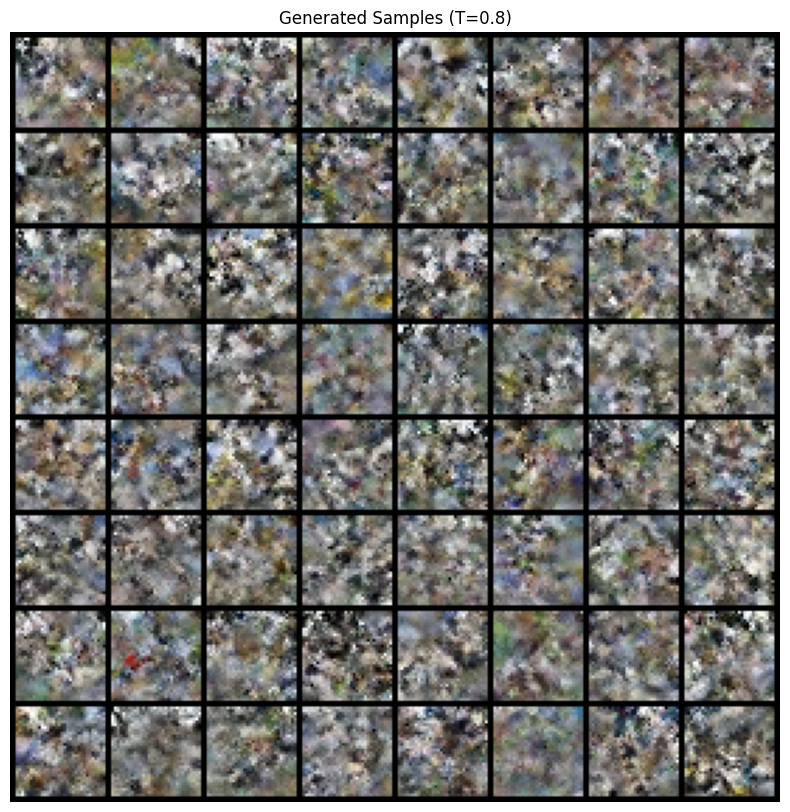

Logged final samples to WandB.


In [8]:
# Load best model (automatically saved during training)
from src.vae.model import NVAE
import torchvision.utils as vutils

model = NVAE(
    hidden_dim=config['hidden_dim'],
    latent_dim=config['latent_dim'],
    num_scales=config['num_scales']
).to(device)

model.load_state_dict(torch.load(os.path.join(config['model_save_dir'], 'nvae_best.pth')))
print("Loaded best model.")

# Generate
samples = generate_samples(model, num_samples=64, temperature=0.8, device=device)

# Visualize locally
plt.figure(figsize=(10, 10))
grid_img = vutils.make_grid(samples, nrow=8, normalize=True)
plt.imshow(grid_img.permute(1, 2, 0).cpu().numpy())
plt.axis('off')
plt.title("Generated Samples (T=0.8)")
plt.show()

# Log to WandB if active
if wandb.run is not None:
    wandb.log({
        "final_evaluation/generated_samples_grid": [wandb.Image(grid_img, caption="Final Generated Samples (T=0.8)")]
    })
    print("Logged final samples to WandB.")